In [1]:
#Importing Libraries

import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import ast
import seaborn as sns


#Loading Data

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

#Data Cleanup

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

df['job_skills'] = df['job_skills'].apply(lambda skill_list:  ast.literal_eval(skill_list) if isinstance(skill_list, str) else skill_list)


In [2]:
df_US = df[df['job_country']=='United States']
df_skills = df_US.explode('job_skills')
df_skills[['job_title', 'job_skills']]

,job_title,job_skills
0,Senior Clinical Data Engineer / Principal Clin...,None
3,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,python
3,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,c++
3,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,java
3,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,matlab
...,...,...
785692,Data Scientist- Hybrid Work Location,r
785703,Data Analyst - CRYPTOGRAPHY - Full-time,None
785705,Expert Business Data Analyst - Now Hiring,sql
785705,Expert Business Data Analyst - Now Hiring,python


In [3]:
df_skills_count = df_skills.groupby(['job_skills', 'job_title_short']).size()

In [4]:
df_skills_count=df_skills_count.reset_index(name='skill_count')

In [5]:
df_skills_count.sort_values(by='skill_count', ascending=False, inplace=True)

In [7]:
job_titles = df_skills_count['job_title_short'].unique().tolist()

In [9]:
job_titles = sorted(job_titles[:3])

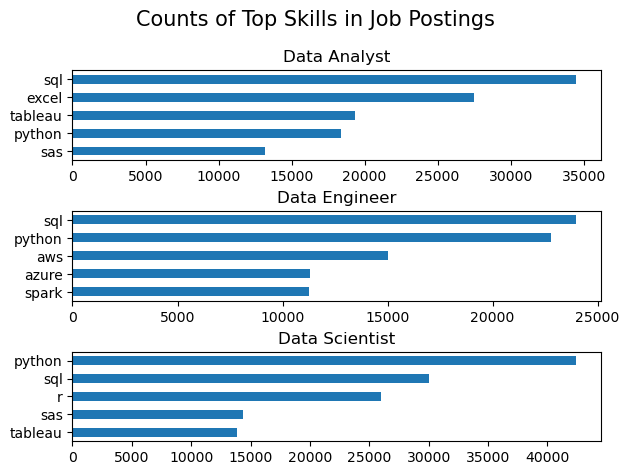

In [18]:
fig, ax = plt.subplots(len(job_titles), 1)

for i, job_title in enumerate(job_titles):
    df_plot = df_skills_count[df_skills_count['job_title_short']==job_title].head(5)
    df_plot.plot(kind='barh', x='job_skills', y='skill_count', ax=ax[i], title=job_title)
    ax[i].invert_yaxis()
    ax[i].set_ylabel('')
    ax[i].legend().set_visible(False)

fig.suptitle("Counts of Top Skills in Job Postings", fontsize=15)
fig.tight_layout(h_pad=0.5)


plt.show()


In [21]:
df_job_title_count = df_US['job_title_short'].value_counts().reset_index(name='jobs_total')

In [24]:
df_skills_pct = pd.merge(df_skills_count, df_job_title_count, how='left', on='job_title_short')
df_skills_pct['skill_percent'] =100 * df_skills_pct['skill_count']/df_skills_pct['jobs_total']

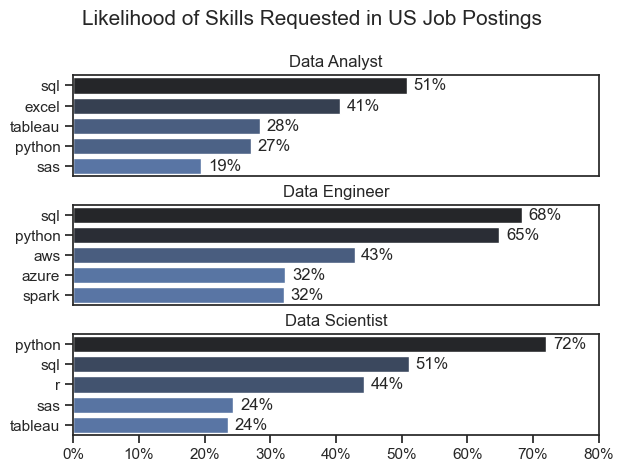

In [34]:
fig, ax = plt.subplots(len(job_titles), 1)

sns.set_theme(style='ticks')

for i, job_title in enumerate(job_titles):
    df_plot = df_skills_pct[df_skills_pct['job_title_short']==job_title].head(5)
    sns.barplot(data=df_plot, x='skill_percent', y='job_skills', ax=ax[i], hue='skill_count', palette='dark:b_r')
    ax[i].set_title(job_title)
    ax[i].set_xlabel('')
    ax[i].set_ylabel('')
    ax[i].legend().set_visible(False)
    ax[i].set_xlim(0,80)
    ax[i].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'{int(x)}%'))
    for  n, v in enumerate(df_plot['skill_percent']):
        ax[i].text(v+1, n, f'{v:.0f}%', va='center')
    
    if i !=len(job_titles)-1:
        ax[i].set_xticks([])

fig.suptitle("Likelihood of Skills Requested in US Job Postings", fontsize=15)
fig.tight_layout(h_pad=0.5)


plt.show()